<a href="https://colab.research.google.com/github/vishwanaik15/DataMining_Project/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Mining Term Project**

Name: Vishwa Chetankumar Naik<br>
UTA ID: 1001871311

**Import required dependencies**

In [128]:
import os
import sys
import re
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection,preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,classification_report
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge,RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import time
from time import sleep

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Mount google drive.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir('/content/gdrive/My Drive/Data Mining/')

**Data acquisition from google drive**

In [ ]:
dataset =  pd.read_csv("data.csv",encoding='latin1',low_memory=False)
print("Length of review data: ",len(dataset))
dataset.head()

Length of review data:  1415138


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


**Dataset exploration.**

In [ ]:
# counting total NaN values in each column
dataset.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

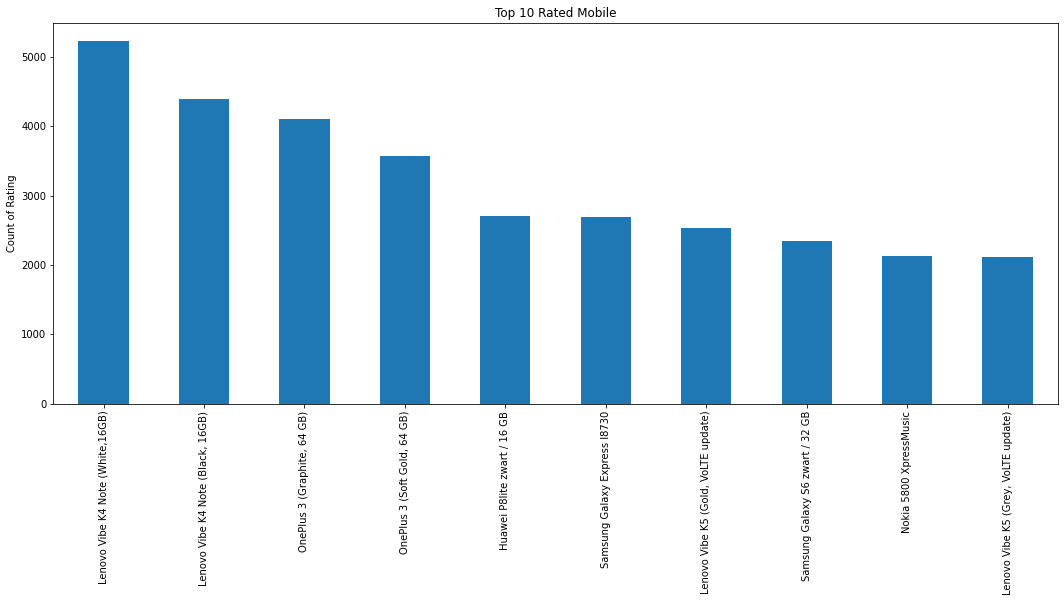

In [ ]:
# this chart represents top 50 rated words from dataframe 
plt.figure(figsize=(18, 7))
dataset['product'].value_counts()[:10].plot(kind='bar')
plt.ylabel('Count of Rating')
plt.title('Top 10 Rated Mobile')
plt.show()



*   **Here I have extracted Important columns from dataset for further analysis**



In [ ]:
def extract_data(dataset):
    x = pd.read_csv(dataset,engine='python')
    x = x[x['lang'] == 'en']
    x.reset_index(inplace=True)
    return x[['score','extract','product']]
dataset = extract_data('data.csv')

In [ ]:
col_name = ["Rating", "Review", "Mobilephone"]
dataset.columns = col_name

In [ ]:
dataset.head()

,Rating,Review,Mobilephone
0,10,As a diehard Samsung fan who has had every Sam...,Samsung Galaxy S8
1,10,Love the phone. the phone is sleek and smooth ...,Samsung Galaxy S8
2,6,Adequate feel. Nice heft. Processor's still sl...,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9.2,Never disappointed. One of the reasons I've be...,Samsung Galaxy S8 64GB (AT&T)
4,4,I've now found that i'm in a group of people t...,Samsung Galaxy S8


**Remove missing values from dataset**

In [ ]:
dataset = dataset[['Review','Rating']]
dataset.dropna(inplace=True)
print("Length of dataset after removing missing values: ",len(dataset))
print('')
dataset.head()

Length of dataset after removing missing values:  545424



,Review,Rating
0,As a diehard Samsung fan who has had every Sam...,10
1,Love the phone. the phone is sleek and smooth ...,10
2,Adequate feel. Nice heft. Processor's still sl...,6
3,Never disappointed. One of the reasons I've be...,9.2
4,I've now found that i'm in a group of people t...,4


**Tokenization of Review column and Remove punctuation**

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['Review'] = dataset['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
dataset.head()

,Review,Rating
0,"[as, a, diehard, samsung, fan, who, has, had, ...",10
1,"[love, the, phone, the, phone, is, sleek, and,...",10
2,"[adequate, feel, nice, heft, processor, s, sti...",6
3,"[never, disappointed, one, of, the, reasons, i...",9.2
4,"[i, ve, now, found, that, i, m, in, a, group, ...",4


**Remove stop words from Review**

In [ ]:
stops = set(stopwords.words("english"))
dataset['Review'] = dataset['Review'].apply(lambda x: [item for item in x if item not in stops])
dataset.head()

,Review,Rating
0,"[diehard, samsung, fan, every, samsung, phone,...",10
1,"[love, phone, phone, sleek, smooth, beautiful,...",10
2,"[adequate, feel, nice, heft, processor, still,...",6
3,"[never, disappointed, one, reasons, long, sams...",9.2
4,"[found, group, people, carried, phone, pocket,...",4


In [ ]:
#joining all tokens to proceed further for data modeling
dataset['Review'] = dataset['Review'].apply(' '.join)

In [ ]:
dataset.head()

,Review,Rating
0,diehard samsung fan every samsung phone since ...,10
1,love phone phone sleek smooth beautiful highly...,10
2,adequate feel nice heft processor still sluggi...,6
3,never disappointed one reasons long samsung pr...,9.2
4,found group people carried phone pocket withou...,4


**show unique values in Rating**

In [ ]:
dataset.dropna(inplace=True)
np.unique(dataset.Rating)

array(['1', '1.2', '1.3', '1.4', '1.6', '1.7', '1.8', '10', '2', '2.2',
       '2.3', '2.4', '2.6', '2.7', '2.8', '3', '3.2', '3.3', '3.4', '3.6',
       '3.7', '3.8', '4', '4.2', '4.3', '4.4', '4.6', '4.7', '4.8', '5',
       '5.2', '5.3', '5.4', '5.6', '5.7', '5.8', '5.9', '6', '6.2', '6.3',
       '6.4', '6.6', '6.7', '6.8', '7', '7.1', '7.2', '7.3', '7.4', '7.5',
       '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3', '8.4', '8.5',
       '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2', '9.3', '9.4', '9.5',
       '9.6', '9.7', '9.8'], dtype=object)

*   Converted float rating value in to integer value for convenience

In [ ]:
def apply_trans(p):
    if p >= 1. and p < 2.:
        return 1
    elif p >= 2. and p < 3.:
        return 2
    elif p >= 3. and p < 4.:
        return 3
    elif p >= 4. and p < 5.:
        return 4
    elif p >= 5. and p < 6.:
        return 5
    elif p >= 6. and p < 7.:
        return 6
    elif p >= 7. and p < 8.:
        return 7
    elif p >= 8. and p < 9.:
        return 8
    elif p >= 9. and p < 10.:
        return 9
    else:
        return 10
        
dataset['Rating'] = dataset['Rating'].apply(lambda x :apply_trans(float(x)))
dataset.reset_index(inplace=True)

**Visualize Data**

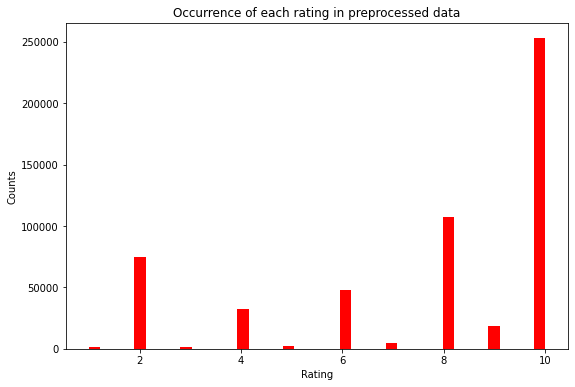

In [ ]:
fig = plt.figure(figsize=(9,6))
n, bins, patches = plt.hist(dataset.Rating, bins=40, facecolor='red',alpha = 1)
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Occurrence of each rating in preprocessed data')
fig.patch.set_facecolor('white')
plt.show()
# width of bars are defined using value of bin



*   **Below function gives the exact values for Ratings.**



In [ ]:
#average value of all the ratings 
print("Average rating: ",dataset['Rating'].mean())
#median value of ratings values
print("Median value: ",dataset['Rating'].median())

Average rating:  7.665067910469653
Median value:  8.0


**Model Creation**

In [ ]:
new_dataset = dataset

In [ ]:
#occurance of each rating in the column
new_dataset['Rating'].value_counts()

10    253010
8     107438
2      75124
6      48205
4      32199
9      18852
7       4846
5       2663
1       1666
3       1421
Name: Rating, dtype: int64

**Split dataset randomly**


*   Train
*   Test
Here , I have divided dataset in to 80:20 ratio as train and test data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset['Review'], new_dataset['Rating'], test_size=0.2) # 80% training and 20% test



*   **Vectorizing our data**
*   **Convert a collection of raw documents to a matrix of TF-IDF features**




**What is TF-IDF?**
*   TF-Term frequency.
*   IDF--Inverse document frequency.
*   TF-IDF is a weight often used in information retrieval and text mining.
*   TfidfVectorizer:
*   Transforms text into a sparse matrix of n-gram counts.
*   TfidfVectorizer and CountVectorizer both are same thing.
*   TfidfTransformer:
*   Performs the TF-IDF transformation from a provided matrix of counts.









In [ ]:
vectorizer = TfidfVectorizer()
transformer = TfidfTransformer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train_counts = transformer.fit_transform(X_train)
X_test_counts = transformer.fit_transform(X_test)


**Classification Model**

1.   Linear Support Vector Machine.
2.   Rigid classifier.
3.   Naive Bayes.



**Linear Support vector machine**

In [ ]:
model_linear_SVC = LinearSVC().fit(X_train,y_train.astype('int'))
y_predicted_linear_SVC = model_linear_SVC.predict(X_test)
accuracy = accuracy_score(y_test.astype('int'),y_predicted_linear_SVC) * float(100)
accuracy_linear_svc = str(accuracy)
print('Testing Accuracy for Linear Support vector machine is: '+accuracy_linear_svc+' %')

Testing Accuracy for Linear Support vector machine is: 57.51294861805014 %


Confusion matrix for Linear Support vector machine:



Text(583.8, 0.5, 'Predicted rating')

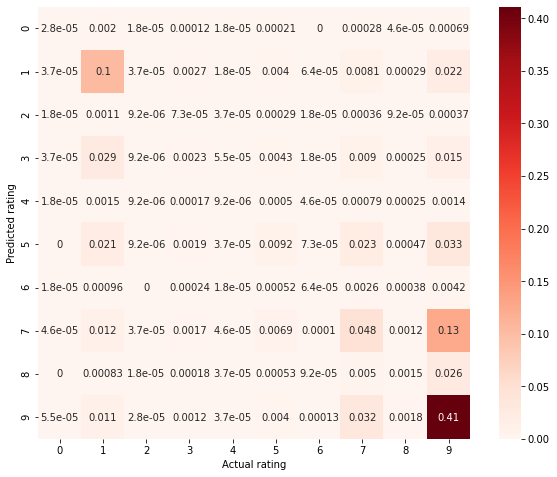

In [ ]:
print("Confusion matrix for Linear Support vector machine:\n")
fig= plt.figure(figsize=(8,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test.astype('int'), y_predicted_linear_SVC)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="Reds")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

**Rigid Classifier**

In [ ]:
model_ridge_class = RidgeClassifier().fit(X_train_counts, y_train.astype('int'))
y_predicted = model_ridge_class.predict(X_test_counts)
y_predicted_ridge_class = np.round(y_predicted)
accuracy = accuracy_score(y_test,y_predicted_ridge_class) * float(100)
ridge_class_accuracy = str(accuracy)
print('Testing Accuracy on ridge classifier model is: '+ridge_class_accuracy+' %')

Testing Accuracy on ridge classifier model is: 56.27904844845762 %


Confusion matrix for Ridge Classifier:



Text(842.9999999999998, 0.5, 'Predicted rating')

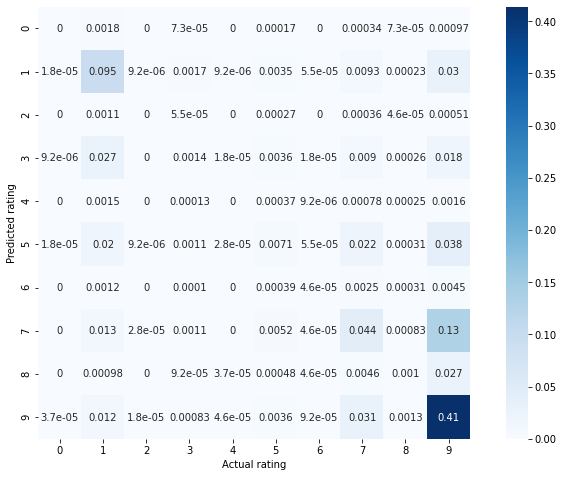

In [ ]:
print("Confusion matrix for Ridge Classifier:\n")
fig= plt.figure(figsize=(10,6))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test.astype('int'), y_predicted_ridge_class)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True, cmap="Blues")
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

**Naive Bayes**

In [ ]:
model_mNB = MultinomialNB().fit(X_train_counts, y_train.astype('int'))
y_predicted_mNB = model_mNB.predict(X_test_counts)
accuracy = accuracy_score(y_test.astype('int'),y_predicted_mNB) * float(100)
accuracy_mNB = str(accuracy)
print('Testing Accuracy on multinomial naive bayes model is: '+accuracy_mNB+' %')

Testing Accuracy on multinomial naive bayes model is: 53.53898336159876 %


Confusion matrix for Multinomial Naive Bayes classifier:



Text(1274.9999999999998, 0.5, 'Predicted rating')

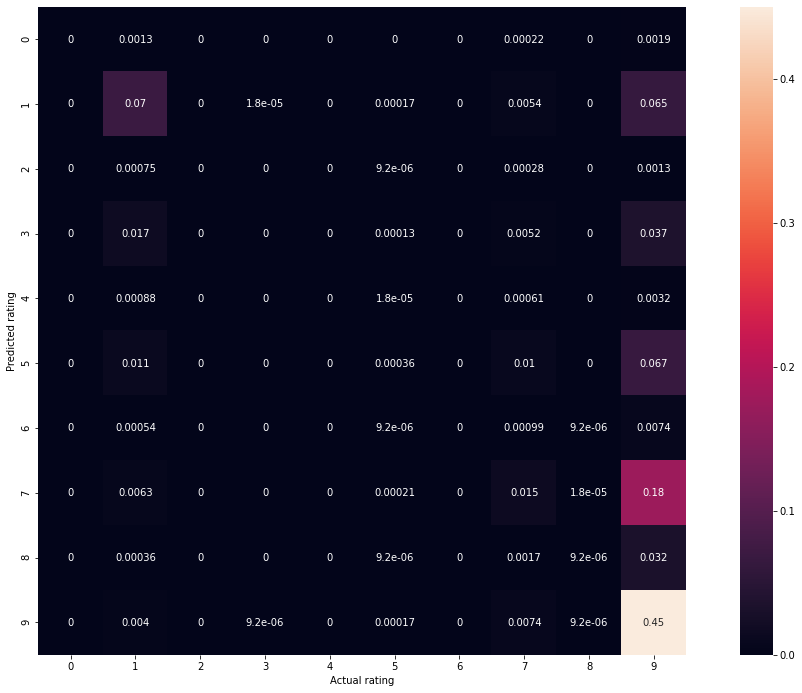

In [ ]:
#confusion matrix for what output we got
print("Confusion matrix for Multinomial Naive Bayes classifier:\n")
fig= plt.figure(figsize=(15,9))
ax = fig.add_axes([1,1,1,1])
matrix = confusion_matrix(y_test.astype('int'), y_predicted_mNB)
sb.heatmap(matrix/np.sum(matrix), square=True, annot=True)
ax.set_xlabel('Actual rating')
ax.set_ylabel('Predicted rating')

**Performance evaluation of Models:**


*   F1 score
*   Precision
*   Support




In [ ]:
labels = ['0.0','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0']
p = classification_report(y_test.astype('int'), y_predicted_linear_SVC , target_names=labels,zero_division=1)
print("Report for Linear SVC:\n ")
print(p)
print('')

Report for Linear SVC:
 
              precision    recall  f1-score   support

         0.0       0.11      0.01      0.01       376
         1.0       0.57      0.74      0.64     15333
         2.0       0.05      0.00      0.01       256
         3.0       0.22      0.04      0.07      6485
         4.0       0.03      0.00      0.00       510
         5.0       0.30      0.10      0.15      9637
         6.0       0.11      0.01      0.01       979
         7.0       0.37      0.24      0.29     21404
         8.0       0.24      0.04      0.07      3740
         9.0       0.64      0.89      0.75     50365

    accuracy                           0.58    109085
   macro avg       0.26      0.21      0.20    109085
weighted avg       0.50      0.58      0.51    109085




In [ ]:
p = classification_report(y_test.astype('int'), y_predicted_ridge_class, target_names=labels,zero_division=1,)
print("Report for Ridge regression:\n ")
print(p)

Report for Ridge regression:
 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       376
         1.0       0.55      0.68      0.61     15333
         2.0       0.00      0.00      0.00       256
         3.0       0.21      0.02      0.04      6485
         4.0       0.00      0.00      0.00       510
         5.0       0.29      0.08      0.13      9637
         6.0       0.12      0.01      0.01       979
         7.0       0.36      0.22      0.28     21404
         8.0       0.22      0.03      0.05      3740
         9.0       0.62      0.90      0.73     50365

    accuracy                           0.56    109085
   macro avg       0.24      0.19      0.18    109085
weighted avg       0.48      0.56      0.49    109085



In [ ]:
p = classification_report(y_test.astype('int'), y_predicted_mNB, target_names=labels,zero_division=1,)
print("Report for KNN:\n ")
print(p)

Report for KNN:
 
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       376
         1.0       0.62      0.50      0.56     15333
         2.0       1.00      0.00      0.00       256
         3.0       0.00      0.00      0.00      6485
         4.0       1.00      0.00      0.00       510
         5.0       0.33      0.00      0.01      9637
         6.0       1.00      0.00      0.00       979
         7.0       0.31      0.07      0.12     21404
         8.0       0.20      0.00      0.00      3740
         9.0       0.54      0.97      0.69     50365

    accuracy                           0.54    109085
   macro avg       0.60      0.16      0.14    109085
weighted avg       0.45      0.54      0.42    109085



**Accuracy and F1 score for each classifer**


1.   **Linear Support Vector Machine**
*   Accuracy: 57.73387725168446
*   F1 Score: 0.58

2.   **Rigit Classifier**
*   Accuracy: 56.466058578172984 %
*   F1 Score: 0.56

3.   **Naive Bayes**
*   Accuracy: 53.6609066324426 %
*   F1 Score: 0.54









**Final Result**

In [ ]:
acc1 = float(accuracy_linear_svc)
acc2 = float(ridge_class_accuracy)
acc3 = float(accuracy_mNB)

In [ ]:
acc=[]
acc.append(acc1)
acc.append(acc2)
acc.append(acc3)

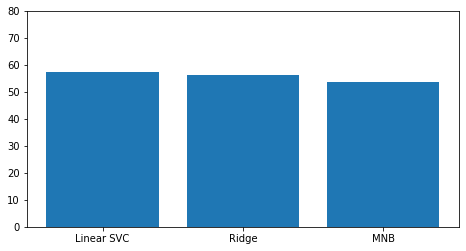

In [ ]:
fig = plt.figure(figsize=(6,3))
labels = ['Linear SVC','Ridge','MNB']
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(labels,acc)
plt.ylim(0,80)
plt.show()

In [ ]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
from sklearn.externals import joblib
joblib.dump(model_linear_SVC,'model_linear_svc.sav')
joblib.dump(model_ridge_class,'model_ridge_class.sav')
joblib.dump(model_mNB,'model_mNB.sav')
joblib.dump(vectorizer,'vectorizer.sav')
joblib.dump(transformer,'transformer.sav')

['transformer.sav']

**As from above result Linear Support Vector machine gives the highest accuracy so I will use this for random review input**

In [ ]:
def accuracy_linear_svc(smt):
  smt=[smt] 
  smt = vectorizer.transform(smt) 
  smt = transformer.fit_transform(smt) #transforming input string vector
  prediction = np.round(model_linear_SVC.predict(smt)) #using ridge classifier trained model to predict rating for what user has gave input
  return prediction